In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
tasks = pd.read_csv("/Users/sebastiankrawczyk/Downloads/task clustering - task representations.csv")
tasks

,"Manual Task (Classification, input, dataset, target variable)",Learning Task,Instance 1,Instance 2,Instance 3,Dataset 1,Dataset 2,Dataset 3,Target Variable 1,Target Variable 2
0,Classify BTC entities based on the tx network ...,Classification,Bitcoin Entity Attributes,-,-,Blockchain Ledger,-,-,Service Category,-
1,Classify BTC entities based on the tx network ...,Classification,Bitcoin Entity Attributes,-,-,Blockchain Ledger,-,-,Service Category,-
2,Classify ETH address based on the tx network t...,Classification,Ethereum Address Attributes,-,-,Blockchain Ledger,-,-,Service Category,-
3,Classify ETH address based on tx network to ph...,Classification,Ethereum Address Attributes,-,-,Blockchain Ledger,-,-,Phishing Scam,-
4,Classify ETH address based on tx network to ph...,Classification,Ethereum Address Attributes,-,-,Blockchain Ledger,-,-,Phishing Scam,-
5,Classify ETH address based on tx network to ph...,Classification,Ethereum Address Attributes,-,-,Blockchain Ledger,-,-,Phishing Scam,-
6,Classify ETH address based on tx network to ph...,Classification,Ethereum Address Attributes,-,-,Blockchain Ledger,-,-,Phishing Scam,-
7,Classify ETH token network snapshots based on ...,Classification,Ethereum Transaction Network Snapshot Attributes,-,-,Blockchain Ledger,-,-,Anomalous time period or not,-
8,Cluster BTC entities and ETH addresses based o...,Clustering,Bitcoin Entity Attributes,Ethereum Address,-,Blockchain Ledger,-,-,-,-
9,Cluster BTC addresses based on tx network,Clustering,Bitcoin Address Attributes,-,-,Blockchain Ledger,-,-,-,-


In [2]:
# create lists of unique values in each part of task representation
learning_tasks = list(set(tasks['Learning Task']))
instances = list(set(tasks[['Instance 1', 'Instance 2','Instance 3']].values.flatten()))
datasets = list(set(tasks[['Dataset 1', 'Dataset 2', 'Dataset 3']].values.flatten()))
target_variables = list(set(tasks['Target Variable 1']))

In [3]:
# combine lists above for future columns
columns = learning_tasks + instances + datasets + target_variables
columns = [x for x in columns if x!= '-']

In [4]:
# create dataframe for tasks in binary representation 
df = pd.DataFrame(columns=columns).reindex(tasks.index)
df

,Clustering,Classification,Regression,Crypto Assets Prices,Telegram Sentiment,Google Trends Sentiment,Crypto Asset Volatility,Bitcoin Address Attributes,Ethereum Address Attributes,Bitcoin Entity Attributes,...,Crypto Exchange Data,Telegram Messages,Blockchain Ledger,Pump or not,Anomalous time period or not,Volatility,Price,Price direction,Phishing Scam,Service Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for index, row in tasks.iterrows():
    for element in row:
        if element in columns:
            df.loc[index, str(element)] = 1

In [16]:
df.fillna(0, inplace=True)
df

,Clustering,Classification,Regression,Crypto Assets Prices,Telegram Sentiment,Google Trends Sentiment,Crypto Asset Volatility,Bitcoin Address Attributes,Ethereum Address Attributes,Bitcoin Entity Attributes,...,Crypto Exchange Data,Telegram Messages,Blockchain Ledger,Pump or not,Anomalous time period or not,Volatility,Price,Price direction,Phishing Scam,Service Category
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


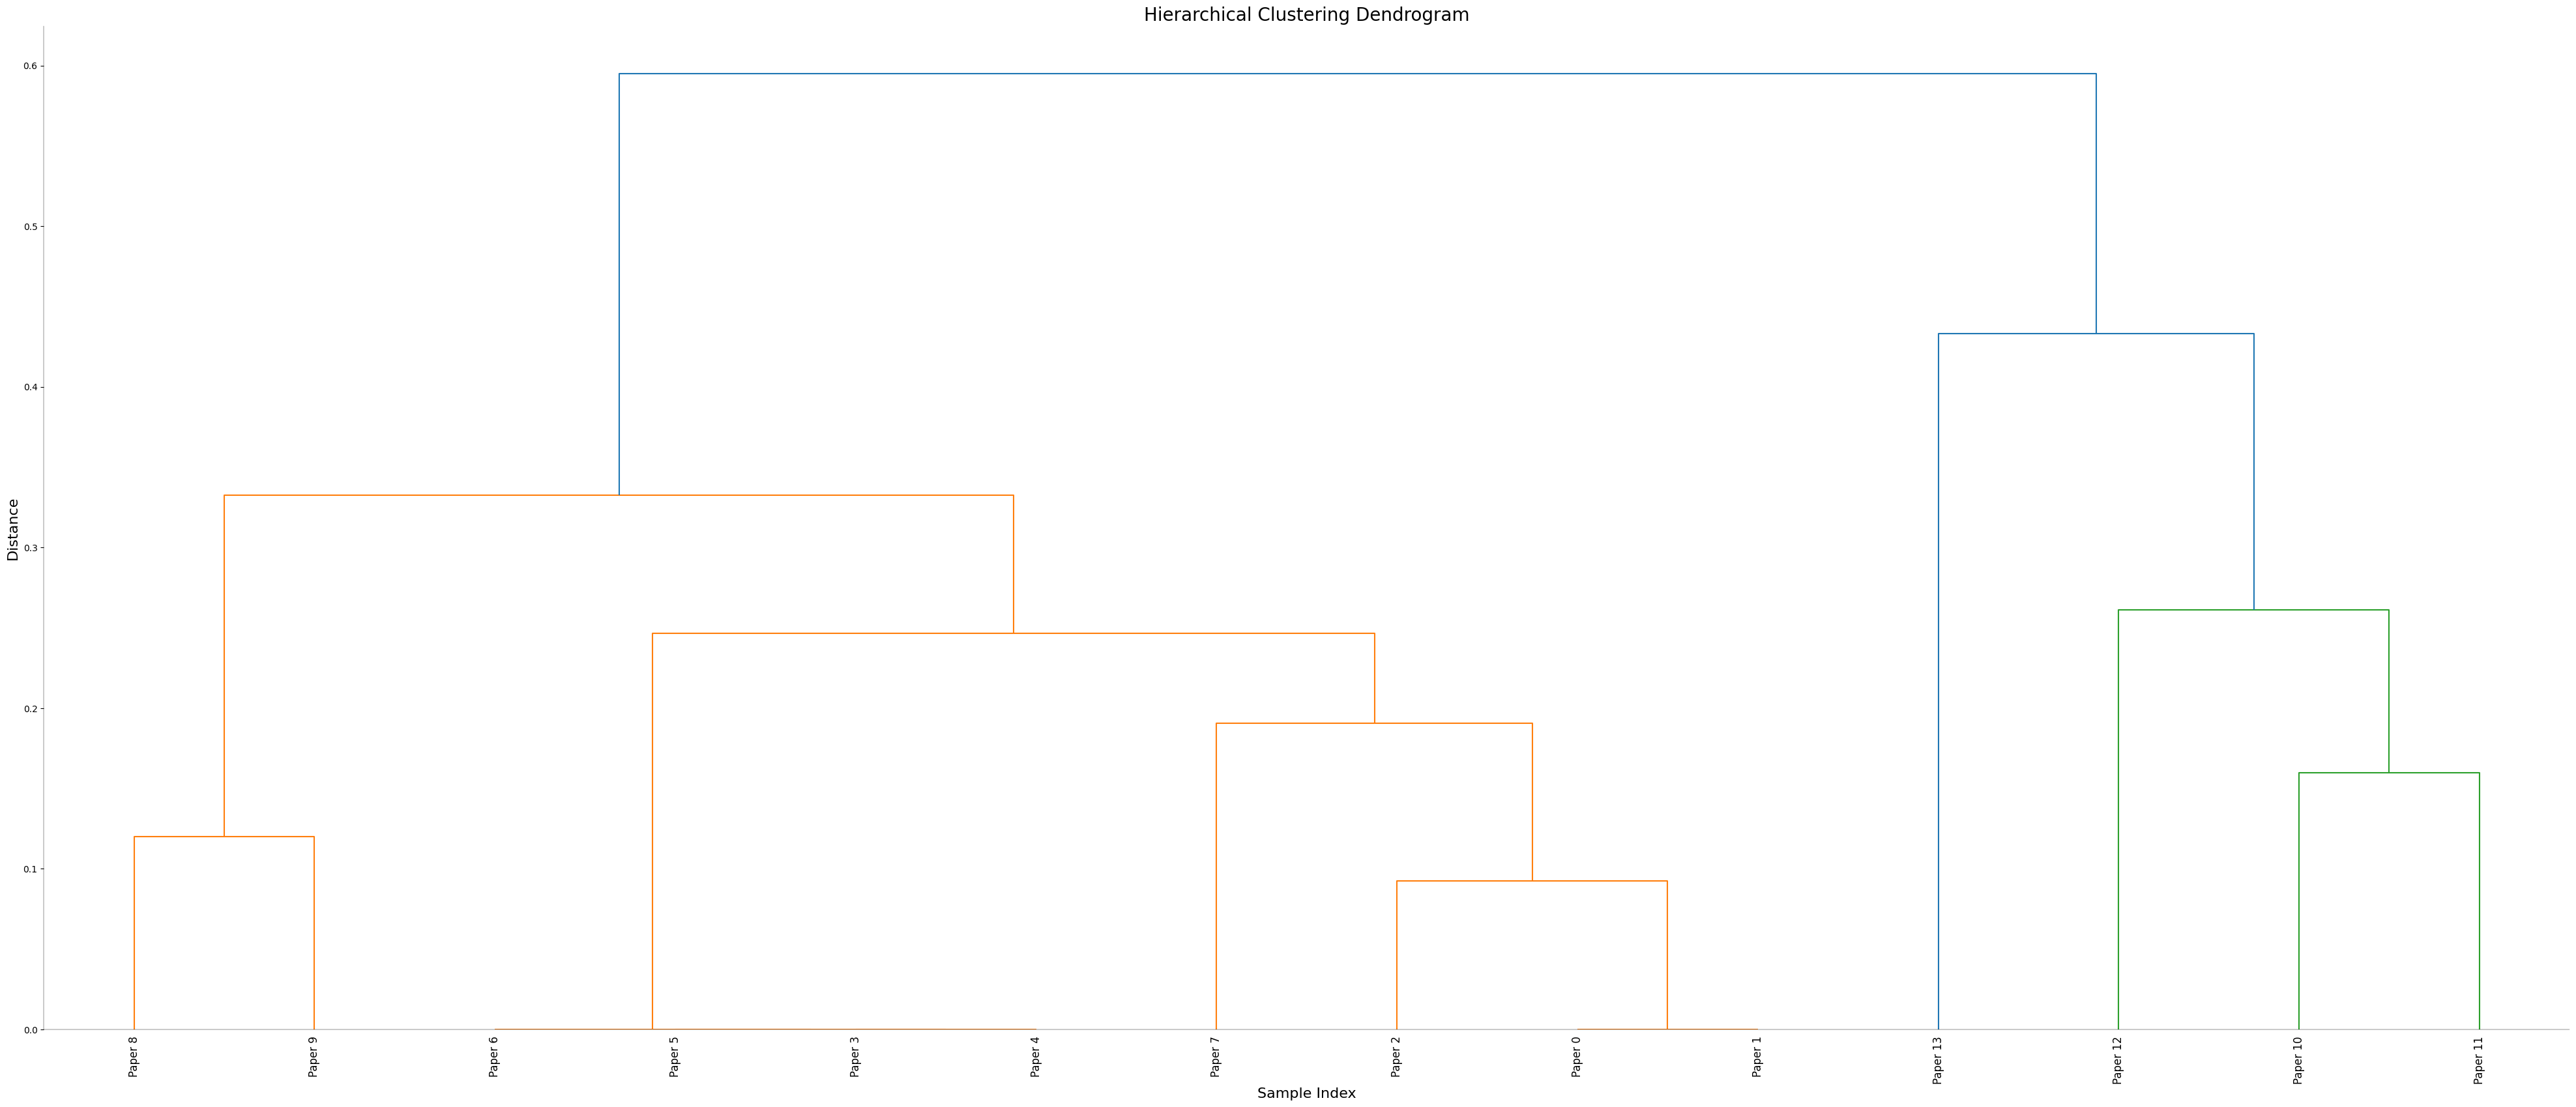

In [15]:
hamming_dist = pdist(df, metric='hamming')

Z = linkage(hamming_dist, method='ward')

plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Distance', fontsize=16)

# Create a dendrogram with custom leaf labels
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotates the x axis labels
    leaf_font_size=12.,  # Font size for the x axis labels
    leaf_label_func=lambda id: f'Paper {id}',  # Annotate each leaf
    color_threshold=0.7 * max(Z[:, 2]),  # Optional color threshold for clusters
)

plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_linewidth(0.3)
plt.gca().spines['bottom'].set_linewidth(0.3)
plt.savefig('histogram.png')
plt.show()

Paper 8 & 9 are clustering papers

Paper 6 5 3 4 are phishing scam detection papers

Paper 7 is classification of anomalous time period in BTC transactional graph

Paper 2 is classification of ethereum addresses to service categoreis

Paper 0 and 1 is classification of bitcoin entities into service categories

Paper 13 is classification of crypto price direction using sentiment data from telegram and google trends

paper 12 is classification of coin as pump or not

paper 10 is regression of volatility

paper 11 is regression of price